In [6]:
import logging, itertools

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import astropy.io.ascii as at
from astropy.io import fits
from astropy.wcs import WCS
from scipy.linalg import cho_solve, cho_factor
import photutils

from k2phot import centroid
from k2phot import plot
from k2phot import tpf_io
from k2phot import phot

logging.basicConfig(level=logging.DEBUG)

In [14]:
filename = "tpf/ktwo203033414-c02_lpd-targ.fits.gz"
outfilename = filename.split("/")[-1][:-17]
table, times, pixels, maskmap, maskheader = tpf_io.get_data(filename)

In [16]:
init = centroid.init_pos(maskheader)
coadd = np.sum(pixels,axis=0)
quad_coords = centroid.quadratic_centroid(coadd, init=init)

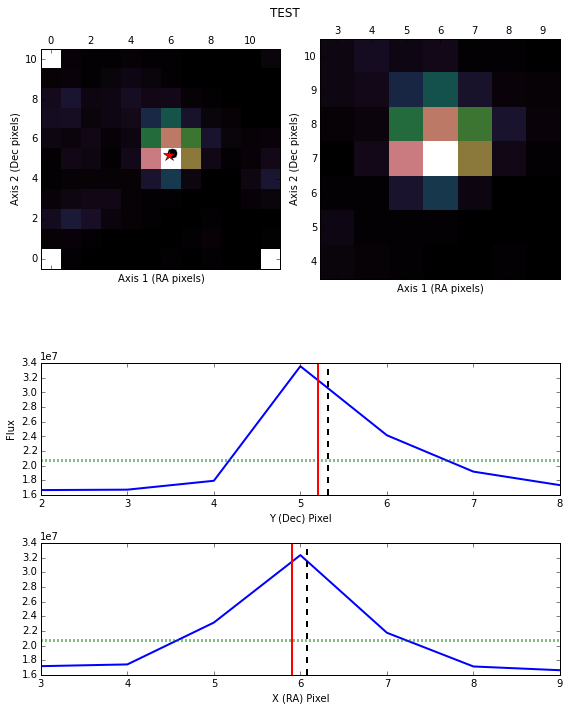

In [44]:
reload(centroid)
fw_coords = centroid.flux_weighted_centroid(coadd, 7, init, to_plot=True)